# Introduction

## What are Autoencoders ?

`오토 인코더`는 출력이 입력과 동일한 특수한 유형의 신경망 아키텍처입니다.(딥러닝에서의 비지도 학습(unsupervised learning)이라고 할 수 있는 오코인코더) 오토 인코더는 입력 데이터의 매우 낮은 수준의 표현을 학습하기 위해 감독되지 않은 방식으로 훈련됩니다. 그런 다음 이러한 저수준 기능은 실제 데이터를 투영하기 위해 다시 변형됩니다. 오토 인코더는 네트워크가 입력을 예측하도록 요청하는 회귀 작업입니다 (즉, ID 함수 모델링). 이러한 네트워크는 중간에 몇 개의 뉴런의 병목 현상이 심하기 때문에 입력을 디코더가 원래 입력을 재현하는 데 사용할 수있는 저 차원 코드로 압축하는 효과적인 표현을 생성해야합니다.
    
예를들어 아래 그림처럼 hidden layer의 뉴런 수를 input layer(입력층) 보다 작게해서 데이터를 압축(차원을 축소)한다거나, 입력 데이터에 노이즈(noise)를 추가한 후 원본 입력을 복원할 수 있도록 네트워크를 학습시키는 등 다양한 오토인코더가 있다. 이러한 제약들은 오토인코더가 단순히 입력을 바로 출력으로 복사하지 못하도록 방지하며, 데이터를 효율적으로 표현(representation)하는 방법을 학습하도록 제어한다.

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile2.uf.tistory.com%2Fimage%2F996C93475BDC97C00AE328)


일반적인 오토 인코더 아키텍처는 다음 세 가지 주요 구성 요소로 구성됩니다.   

**Encoding Architecture**: 인코더 아키텍처는 노드 수가 감소하는 일련의 계층으로 구성되며 궁극적으로 잠재 뷰 재현으로 축소됩니다.  
**Latent View Repersentation** : Latent View는 입력이 감소하고 정보가 보존되는 가장 낮은 수준의 공간을 나타냅니다.  
**Decoding Architecture** : 디코딩 아키텍처는 인코딩 아키텍처의 미러 이미지이지만 모든 레이어의 노드 수가 증가하여 궁극적으로 유사한 (거의) 입력을 출력합니다.
  
![](https://i.imgur.com/Rrmaise.png)

  
고도로 미세 조정 된 자동 인코더 모델은 첫 번째 레이어에서 전달 된 동일한 입력을 재구성 할 수 있어야합니다. 이 커널에서는 오토 인코더의 작동과 그 구현에 대해 설명하겠습니다.  
  
**오토 인코더는 이미지 데이터와 함께 광범위하게 사용되며 일부 사용 사례는 다음과 같습니다.**

- 차원 감소
- 이미지 압축
- 이미지 노이즈 제거
- 이미지 생성
- 특징 추출

## How Autoencoders Work ?

**`오토 인코더`의 기본 아이디어는 높은 수준의 차원 데이터에 대한 낮은 수준의 재현을 배우는 것**입니다.   

- `인코더(encoder)` : 인지 네트워크(recognition network)라고도 하며, 입력을 내부 표현으로 변환한다.  

- `디코더(decoder)` : 생성 네트워크(generative nework)라고도 하며, 내부 표현을 출력으로 변환한다.


**Step1 : 잠복 공간에 포인트 재현**    
데이터 표현 공간에서 점 A와 B의 좌표가 다음과 같은 경우 :
  
지점 A : (x1A, x2A)  
지점 B : (x1B, x2B)  
잠재 뷰 공간에서의 좌표는 다음과 같습니다.  
    
(x1A, x2A) ---> (0, 0)  
(x1B, x2B) ---> (u1B, u2B)
  
  
점 A : (0, 0)  
지점 B : (u1B, u2B)  
여기서 u1B와 u2B는 점과 기준점 사이의 거리 형태로 표현 될 수 있습니다.  
  
u1B = x1B-x1A  
u2B = x2B-x2A  
  
**Step2 : 거리 d와 각도 L로 점 표시**
  
이제 u1B와 u2B는 거리 d와 각도 L의 조합으로 표현할 수 있습니다. 그리고 이것을 각도 L만큼, 수평축쪽으로 회전하면 L은 0이됩니다.  
=> (d, L)  
=> (d, 0) (회전 후)  
  
이것은 인코딩 프로세스의 출력이며 데이터를 낮은 차원으로 표시합니다. 모든 계층의 가중치와 편향이있는 신경망의 기본 방정식을 상기하면  
=> (d, 0) = W. (u1B, u2B)  
==> (인코딩)  
  
여기서 W는 은닉층의 가중치 행렬입니다.   
따라서 디코딩 프로세스는 인코딩 프로세스의 미러 이미지라는 것을 알고 있습니다.  
=> (u1B, u2B) = 역 (W). (d, 0)  
==> (디코딩)  
  
축소 된 형태의 데이터 (x1, x2)는 인코딩 아키텍처에서 얻은 잠재 뷰 공간에서 (d, 0)입니다. 마찬가지로 디코딩 아키텍처는이 표현을 원래 형식 (u1B, u2B)으로 다시 변환 한 다음 (x1, x2)로 변환합니다. 중요한 점은 데이터 유형에 따라 규칙 / 학습 기능 / 인코딩 디코딩 방정식이 다를 수 있다는 것입니다. 예를 들어 2 차원 공간에서 다음 데이터를 고려하십시오.

![](https://i.imgur.com/lfq4eEy.png)

## Different Rules for Different data


모든 유형의 데이터에 동일한 규칙을 적용 할 수는 없습니다. 예를 들어, 이전 예에서 선형 데이터 매니 폴드를 한 차원으로 투영하고 각도 L을 제거했습니다.하지만 데이터 매니 폴드를 제대로 투영 할 수없는 경우에는 어떻게됩니까? 예를 들어 다음 데이터 매니 폴드 뷰를 고려하십시오.  
![](https://www.kaggleusercontent.com/kf/5865610/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..feB_WKfPj3W3Jh_vxs6Tww.uk7hM0BZr8sgt8lVJjhcZJF0T0mvtQQUY1x_VmMyjDCfIVSYvqgeE__N2j7JTNVOv4lkx9CNoDx6UQ1vXU-okhrQkNQHC6NWsbaBzK5J-Ss-zA6WAlp5iXLUO-4qXd3UaL7De-PtY847PXFP50HEERGUFDeJ0GkObSDiYFpDUhhq0gkKLdME6SypN_Wac-WfBSf4DFIhmYDDNYjG23cXNGpR18KcB9UOTwF_uygSea0SM7m4ciNopREql9CEgnrcaI1NOehTb0EVPV6X0W_t9gHmBjZ8SuEea5ai7qjRn4KnmYpG9DdsvxgOZihrXBUI7Z1FWOHhvHToOFWqsgW6IQyObl61wqz3zFz5yKgOBj1cVRU8jkdYctoxESqugUGUM_wQLRrDl8BgMysT62e0GE1Nn6oyPGjV7M0aNuDo9b-U3QxgybW-w4nJ9YA3iRvl_ruVvfgXG1RdiIiQkg_lq23TAsdyHZX4_-n-6AI5vs8E3v77UNhUbqAA1xsC-8QS8MpieuBDJPfFwjW4-mrTQ9GeomYV1E8X62lKic1aWZB3Y9CHULbzbPAt9CbjyleaDwKewXwPMv8ln0Lc9jG8RSz-l2nsk-D7TuARi1xI8cn8MkypEwTI6q8gj-W487OoFA3pCv-IrlScMQ-EVx5M5X2tVtM8PAMCbWnVH-Me9xs.2f4bTJVr7TiujCxWFuxmVg/__results___files/__results___5_0.png)

이러한 유형의 데이터에서 핵심 문제는 정보 손실없이 단일 차원의 데이터 프로젝션을 얻는 것입니다. 이러한 유형의 데이터를 잠재 공간에 투사하면 많은 정보가 손실되고, 이를 변형하여 원래 모양으로 투사하는 것이 거의 불가능합니다. 아무리 많은 시프트와 회전이 적용 되어도 원본 데이터는 복구 할 수 없습니다.  
  
그렇다면 신경망은이 문제를 어떻게 해결합니까? 직관은, **매니 폴드 공간에서 심층 신경망은 선형 데이터 폴드 뷰를 얻기 위해 공간을 구부리는 속성을 가지고 있습니다. Autoencoder 아키텍처는 숨겨진 레이어에이 속성을 적용하여 잠재 뷰 공간에서 낮은 수준의 표현을 학습 할 수 있습니다.**  
  
다음 이미지는이 속성을 설명합니다.  

![](https://i.imgur.com/gKCOdiL.png)
     
먼저 이미지에서 특징을 학습 한 다음   
출력과 동일한 이미지를 투사하는 keras를 사용하여 오토 인코더를 구현해 보겠습니다.

# Implementation and UseCases

## UseCase 1: Image Reconstruction(이미지 재구성)

### Load the libraries

In [9]:
## load the libraries 
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

from numpy import argmax, array_equal
import matplotlib.pyplot as plt


from keras.models import Model

#딥러닝 모델을 돌릴 때, Image Data Augmentation을 편하게 해주는 imgaug 라이브러리
# SSL ERROR로 설치 안됨,,,,,ㅠㅠㅠ
from imgaug import augmenters

# 난수 생성, random 라이브러리
from random import randint

import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'imgaug'

### Dataset Prepration

In [5]:
import pandas as pd
import numpy as np

#데이터셋 불러오기 
train = pd.read_csv("fashion-mnist_train.csv")
train_x = train[list(train.columns)[1:]].values
train_y = train['label'].values

# 예측 변수 정규화 및 재구성
train_x = train_x / 255

# train and validation 데이터 생성
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)

# inputs 재구성
train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)


In [7]:
train_x

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01176471,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Create Autoencoder architecture

  이 섹션에서는 오토 인코더 아키텍처를 생성 해 보겠습니다. 인코딩 부분은 2000, 1200 및 500 노드가있는 3 개의 레이어로 구성됩니다. 인코딩 아키텍처는 10 개의 노드로 구성된 잠재 뷰 공간에 연결되고 500, 1200 및 2000 노드가있는 디코딩 아키텍처에 연결됩니다. 최종 계층은 입력 계층으로 정확한 수의 노드로 구성됩니다.
  
  
- `레이어(layer)` : 신경망에서 입력 특성의 집합 또는 뉴런의 출력을 처리하는 뉴런 집합입니다. 텐서플로우에서는 추상적인 의미로 사용되기도 합니다. 레이어는 텐서 및 구성 옵션을 입력으로 취하고 다른 텐서를 출력하는 Python 함수입니다. 필요한 텐서가 작성되면 사용자는 모델 함수를 통해 결과를 에스티메이터로 변환할 수 있습니다.

- `노드(node)` : 중복으로 정의된 용어로서 다음 중 하나를 의미합니다.(히든 레이어의 뉴런,텐서플로우 그래프의 연산)


In [10]:
# input layer
input_layer = Input(shape=(784,))

# encoding architecture
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

# latent view
latent_view   = Dense(10, activation='sigmoid')(encode_layer3)

# decoding architecture
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)

# output layer
output_layer  = Dense(784)(decode_layer3)

model = Model(input_layer, output_layer)

In [11]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1500)              1177500   
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1501000   
_________________________________________________________________
dense_3 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5010      
_________________________________________________________________
dense_5 (Dense)              (None, 500)               5500      
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              5010

In [12]:
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(train_x, train_x, epochs=20, batch_size=2048, validation_data=(val_x, val_x), callbacks=[early_stopping])


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 24s 498us/step - loss: 0.0944 - val_loss: 0.0710
Epoch 2/20
48000/48000 [==============================] - 23s 487us/step - loss: 0.0628 - val_loss: 0.0516
Epoch 3/20
48000/48000 [==============================] - 23s 479us/step - loss: 0.0456 - val_loss: 0.0410
Epoch 4/20
48000/48000 [==============================] - 23s 469us/step - loss: 0.0387 - val_loss: 0.0371
Epoch 5/20
48000/48000 [==============================] - 22s 454us/step - loss: 0.0355 - val_loss: 0.0338
Epoch 6/20
48000/48000 [==============================] - 23s 470us/step - loss: 0.0326 - val_loss: 0.0342
Epoch 7/20
48000/48000 [==============================] - 22s 456us/step - loss: 0.0307 - val_loss: 0.0284
Epoch 8/20
48000/48000 [==============================] - 22s 454us/step - loss: 0.0272 - val_loss: 0.0272
Epoch 9/20
48000/48000 [==============================] - 22s 467us/step - loss: 0.0255 - val

In [13]:
preds = model.predict(val_x)

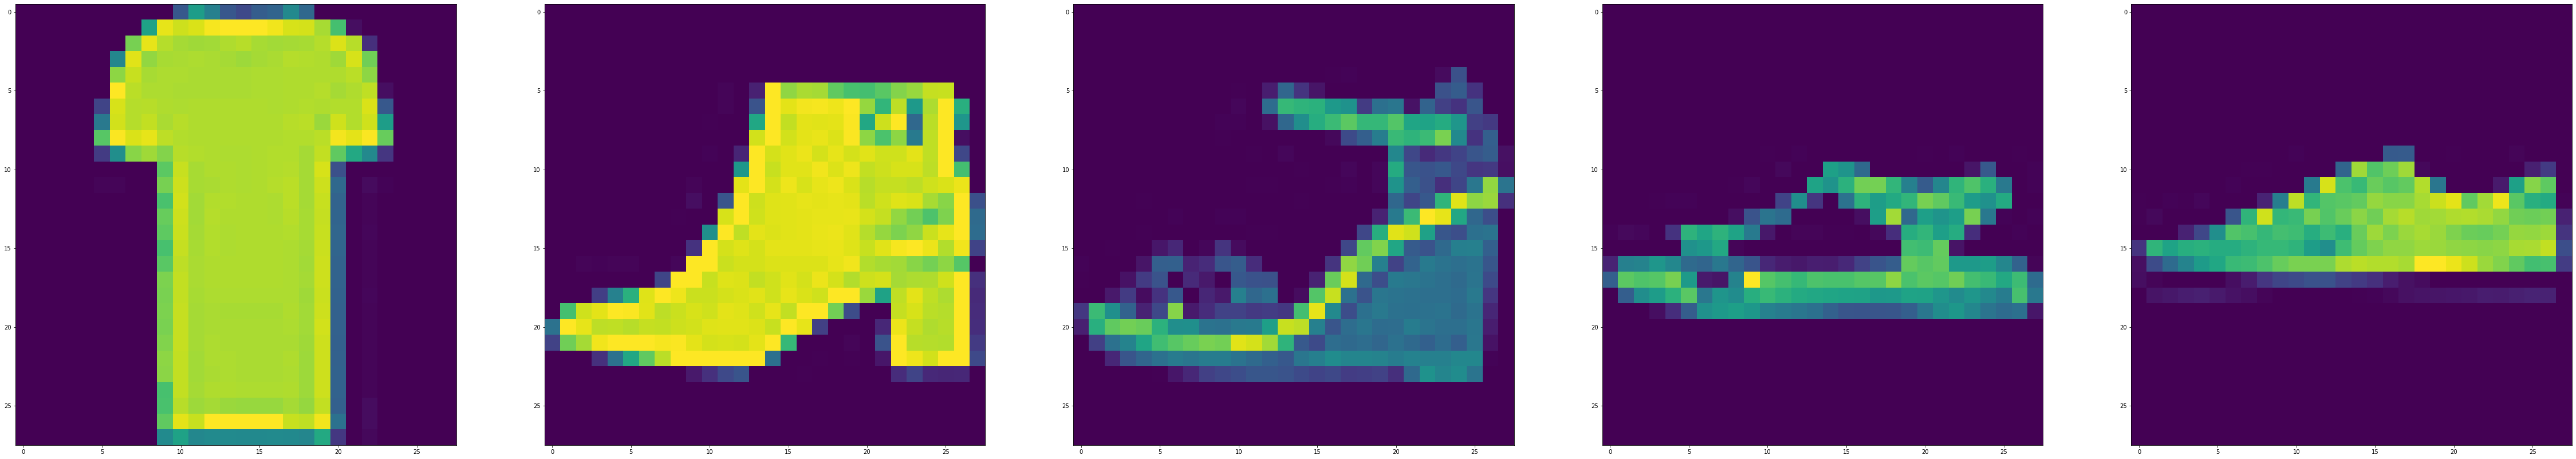

In [14]:
# Inputs: Actual Images
from PIL import Image 
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(val_x[i].reshape(28, 28))
plt.show()

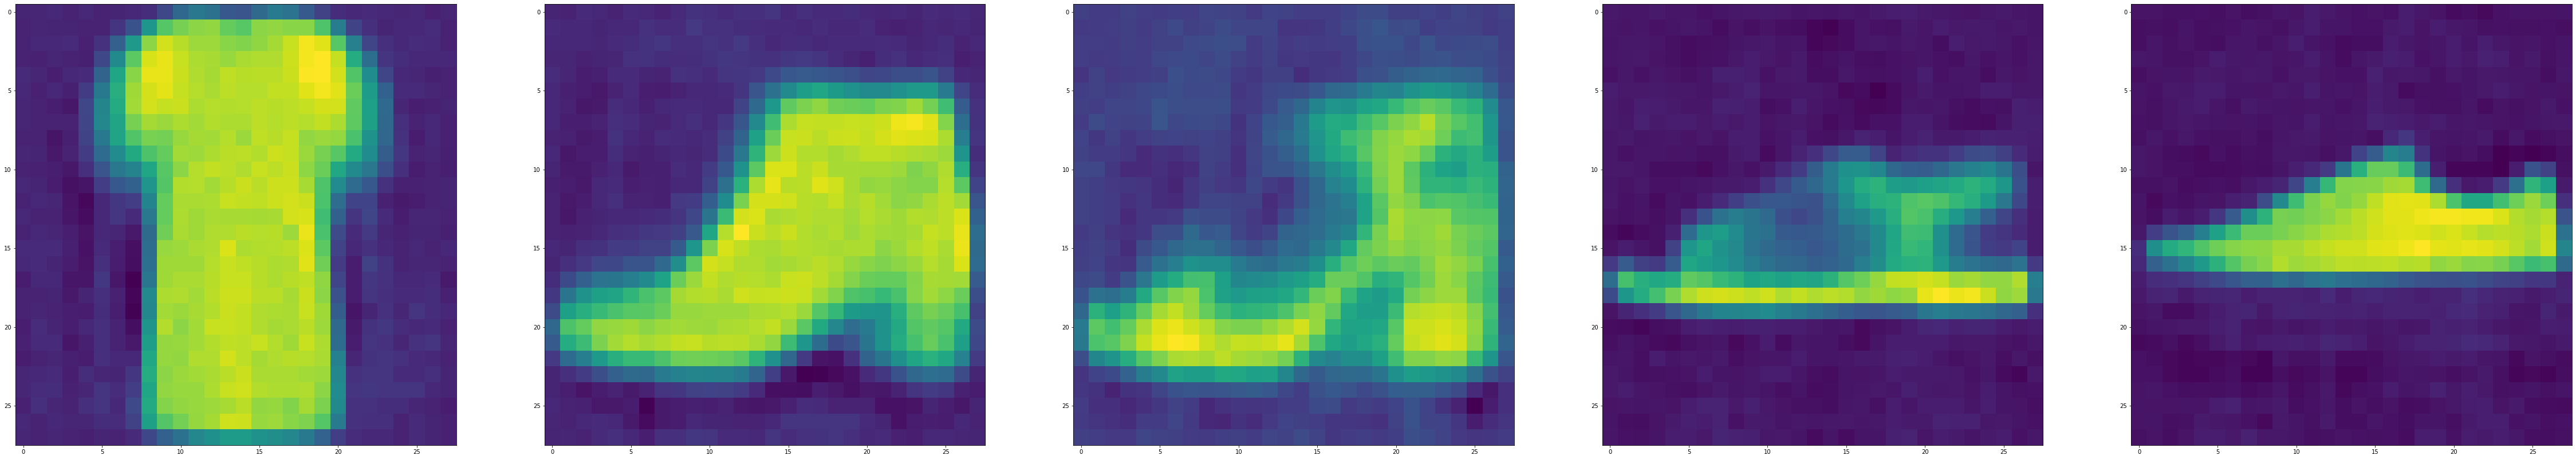

In [15]:
# Predicted : Autoencoder Output
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(preds[i].reshape(28, 28))
plt.show()

따라서 20 개의 epooch로 훈련 된 오토 인코더가 입력 이미지를 매우 잘 재구성 할 수 있음을 알 수 있습니다.   
자동 인코더의 다른 사용 사례를 살펴 보겠습니다. 이미지 노이즈 제거 또는 이미지 노이즈 제거.

## UseCase 2: Noise Removal

오토 인코더는 매우 유용합니다. 오토 인코더의 또 다른 애플리케이션 인 이미지 노이즈 제거를 살펴 보겠습니다. 입력 이미지에는 데이터에 노이즈가 포함 된 경우가 많으며 자동 인코더를 사용하여 해당 이미지를 제거 할 수 있습니다. 실제로 그것을 볼 수 있습니다. 먼저 이미지 픽셀을 구성하는 train_x 및 val_x 데이터를 준비합니다.

![](https://www.learnopencv.com/wp-content/uploads/2017/11/denoising-autoencoder-600x299.jpg)

In [17]:
# train_x array and val_x array 생성
train_x = train[list(train.columns)[1:]].values
train_x, val_x = train_test_split(train_x, test_size=0.2)

# 사이즈 정규화
train_x = train_x/255.
val_x = val_x/255.

In [21]:
print(train_x.shape)
print(val_x.shape)

(48000, 784)
(12000, 784)



이 오토 인코더 네트워크에서는 컨벌루션 네트워크가 이미지 입력과 잘 작동하기 때문에 컨볼 루션 레이어를 추가 할 것입니다. 이미지 데이터에 컨볼 루션을 적용하기 위해 28 * 28 행렬의 형태로 입력을 재구성합니다. CNN과 관련된 자세한 내용은 이전 커널을 참조하십시오.

In [23]:
train_x = train_x.reshape(-1, 28, 28, 1)
val_x = val_x.reshape(-1, 28, 28, 1)

print(train_x.shape)
print(val_x.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)


**Noisy Images**

이미지에 의도적으로 노이즈를 도입 할 수 있습니다.   
다양한 변형으로 이미지를 보강하는 데 사용할 수있는 imaug 패키지를 사용하고 있습니다.   
이러한 변형 중 하나는 노이즈의 도입 일 수 있습니다. 이미지에 다양한 유형의 노이즈를 추가 할 수 있습니다. 
  
예를 들면 :

- 소금과 후추 소음(Salt and Pepper Noise)
- 가우스 잡음(Gaussian Noise)
- 주기적인 소음(Periodic Noise)
- 얼룩 노이즈(Speckle Noise)

`임펄스 노이즈`라고도하는 데이터에 `소금과 후추 노이즈`를 도입 해 보겠습니다.   
이 노이즈는 이미지 신호에 날카 롭고 갑작스러운 장애를 유발합니다. 
드물게 발생하는 흰색 및 검정색 픽셀로 나타납니다.


In [25]:
# 노이즈 추가 <샘플>  Salt and Pepper 노이즈
noise = augmenters.SaltAndPepper(0.1)
seq_object = augmenters.Sequential([noise])

train_x_n = seq_object.augment_images(train_x * 255) / 255
val_x_n = seq_object.augment_images(val_x * 255) / 255


NameError: name 'augmenters' is not defined

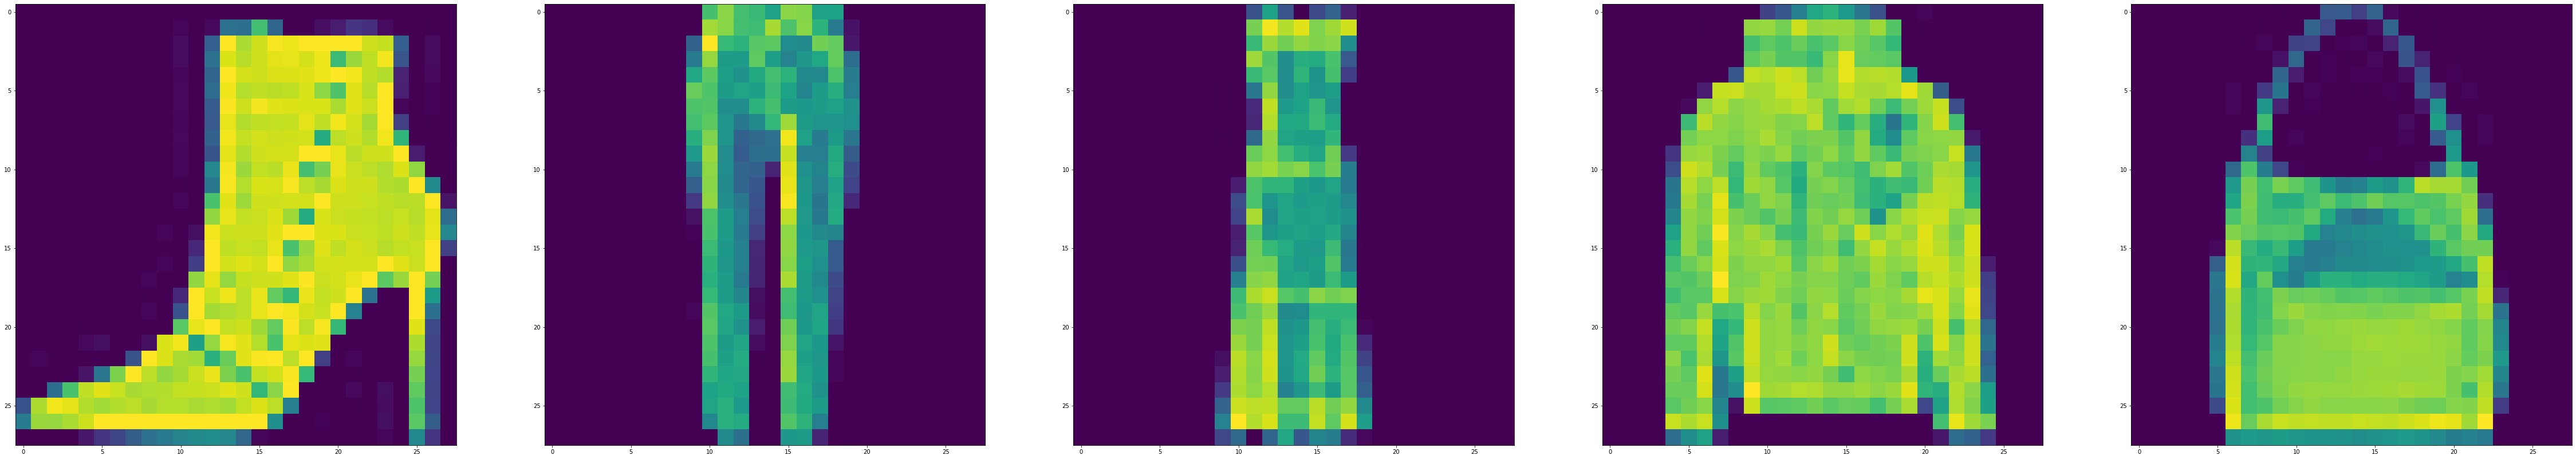

In [26]:
# 노이즈 추가 전
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(train_x[i].reshape(28, 28))
plt.show()

NameError: name 'train_x_n' is not defined

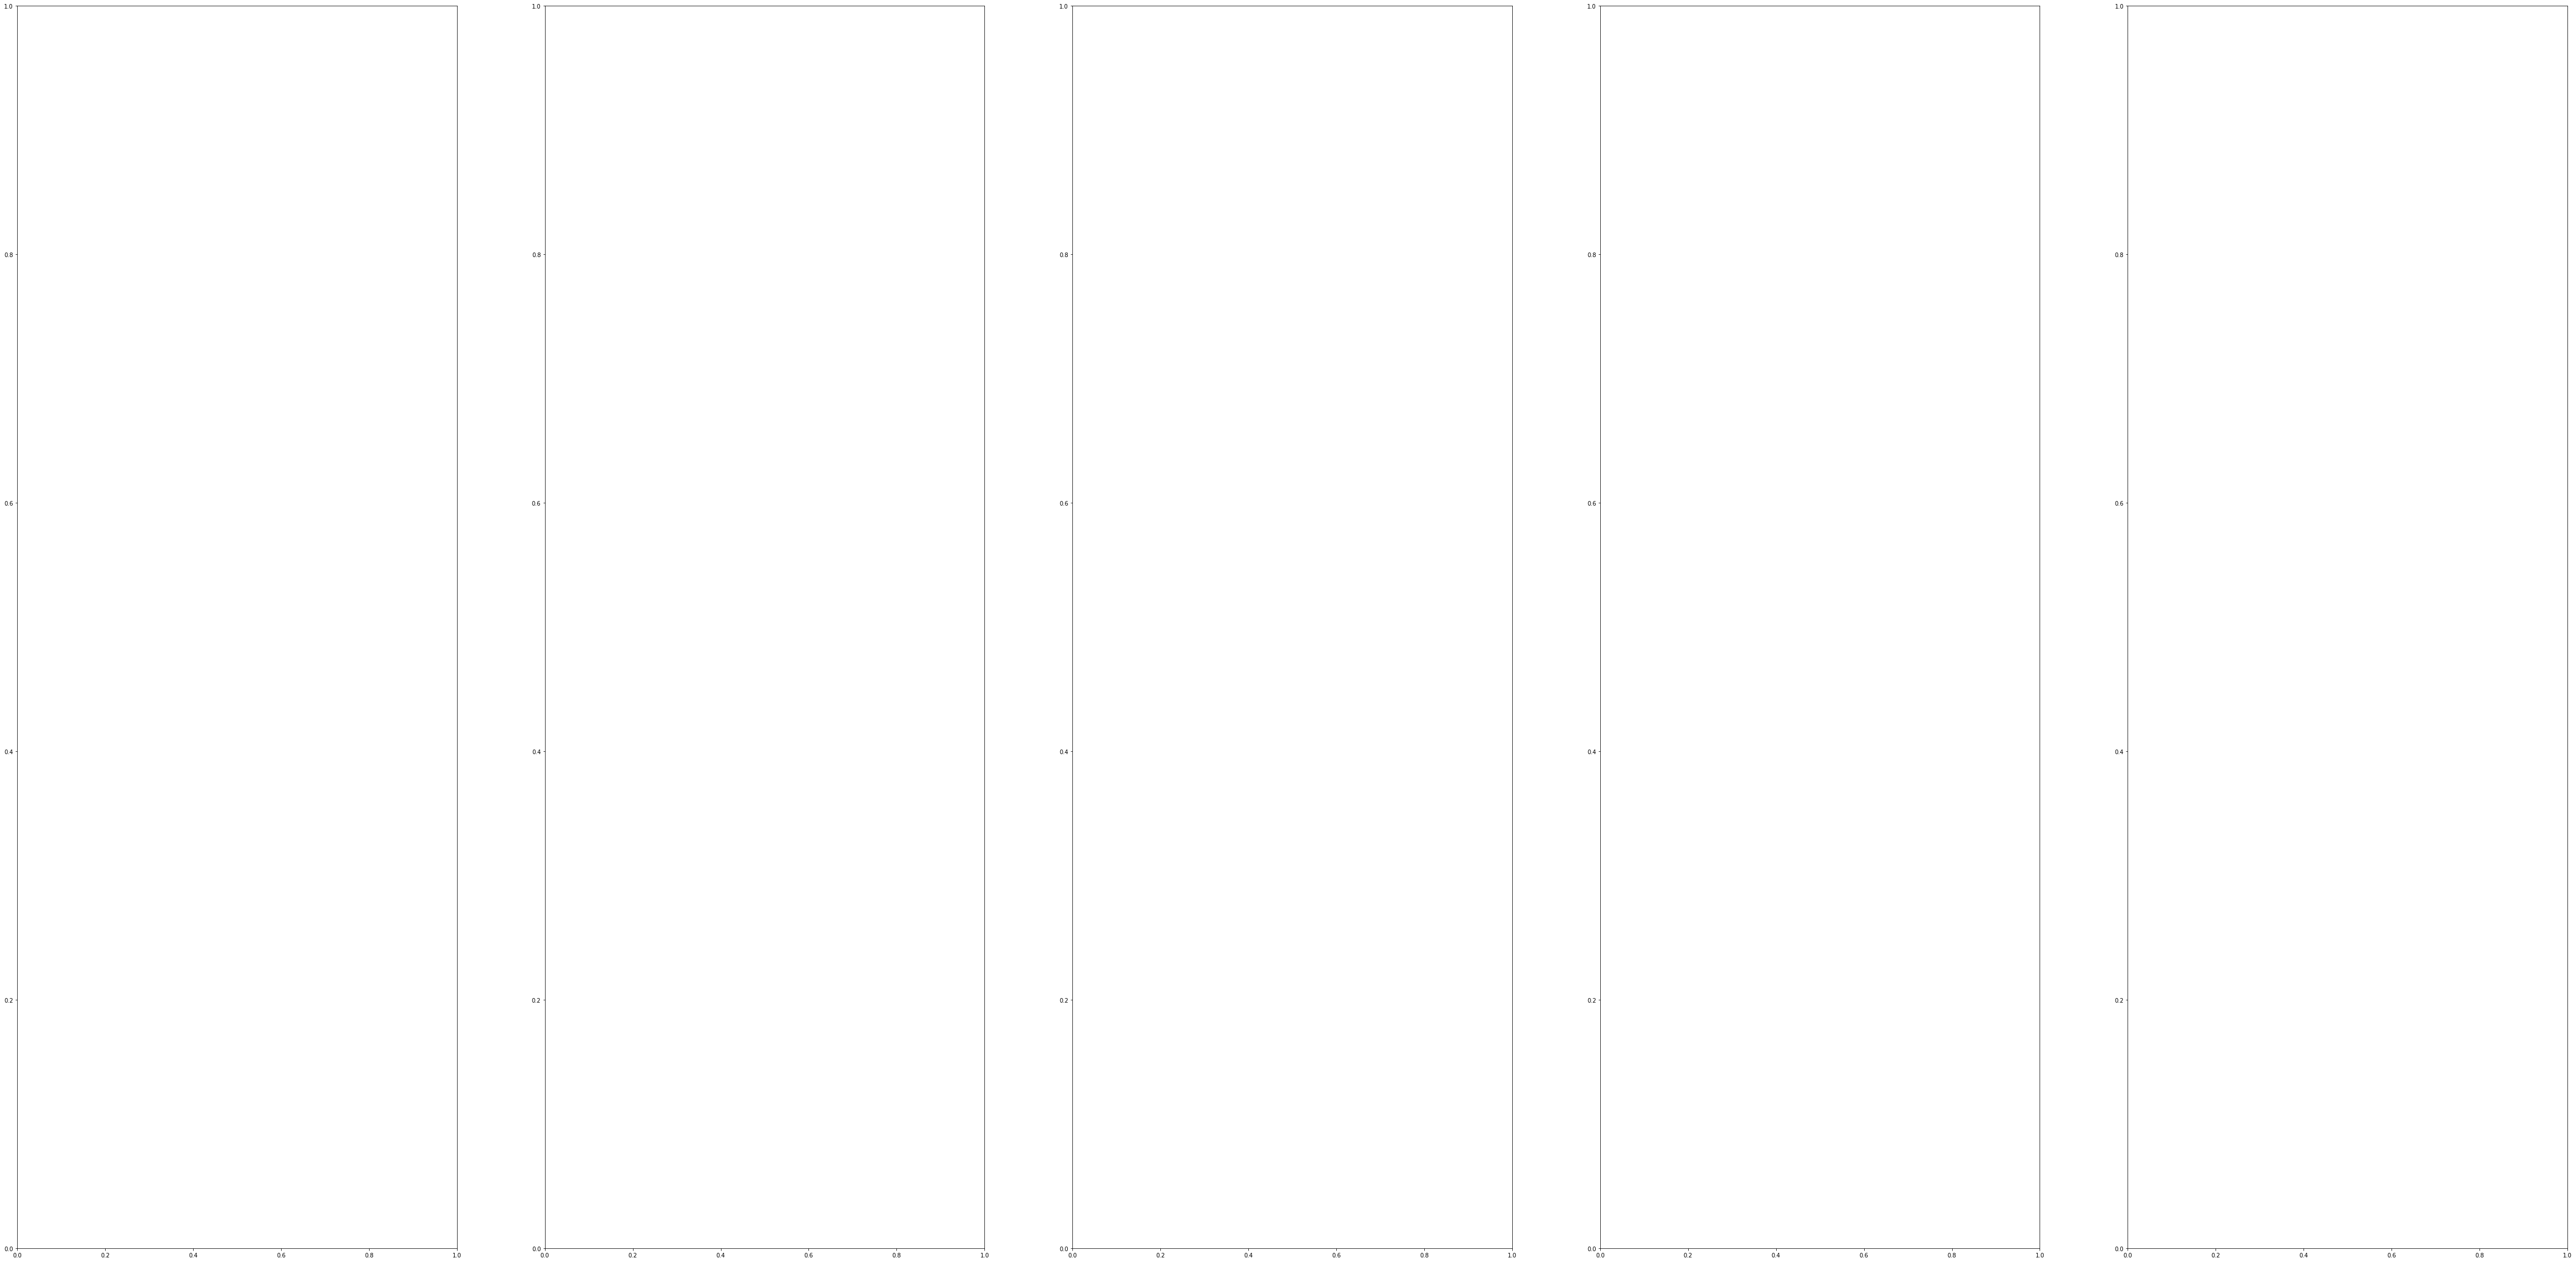

In [27]:
# 노이즈 추가 후
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(train_x_n[i].reshape(28, 28))
plt.show()

이제 오토 인코더를위한 모델 아키텍처를 생성 해 보겠습니다. 이 문제에 대해 어떤 유형의 네트워크를 만들어야하는지 이해하겠습니다.

**Encoding Architecture**:  
인코딩 구조는 **3 개의 컨볼 루션 레이어와 3 개의 최대 풀링 레이어**로 구성되어 있습니다.(3 Convolutional Layers and 3 Max Pooling Layers stacked one by one.)   
`Relu`는 컨볼 루션 레이어에서 활성화 함수로 사용되며 패딩은 "동일"로 유지됩니다. **최대 풀링 레이어의 역할은 이미지 차원을 다운 샘플링하는 것**입니다. 이 레이어는 초기 표현의 겹치지 않는 하위 영역에 최대 필터를 적용합니다.

**Decoding Architecture**:  
디코딩 아키텍처에서 유사하게, 컨볼 루션 레이어는 인코딩 아키텍처와 동일한 차원 (역방향 방식)을 갖는 데 사용됩니다. 그러나 3 개의 maxpooling 레이어 대신 **3 개의 업 샘플링 레이어**를 추가합니다. 다시 활성화 함수는 동일하며 (relu) 컨볼 루션 레이어의 패딩도 동일합니다. **업 샘플링 레이어의 역할은 입력 벡터의 차원을 더 높은 해상도 / 차원으로 업 샘플링하는 것**입니다. 최대 풀링 작업은 비가 역적이지만 각 풀링 영역 내에서 최대 값의 위치를 ​​기록하여 대략적인 역수를 얻을 수 있습니다. Umsampling 레이어는이 속성을 사용하여 낮은 차원의 특징 공간에서 재구성을 투영합니다.

In [28]:
# input layer
input_layer = Input(shape=(28, 28, 1))

# encoding architecture
encoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer1 = MaxPool2D( (2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = MaxPool2D( (2, 2), padding='same')(encoded_layer2)
encoded_layer3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2)
latent_view    = MaxPool2D( (2, 2), padding='same')(encoded_layer3)

# decoding architecture
decoded_layer1 = Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = Conv2D(64, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = UpSampling2D((2, 2))(decoded_layer3)
output_layer   = Conv2D(1, (3, 3), padding='same')(decoded_layer3)

# compile the model
model_2 = Model(input_layer, output_layer)
model_2.compile(optimizer='adam', loss='mse')

In [29]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 16)          0   


조기 중지 콜백으로 모델을 훈련시킵니다. 더 나은 결과를 위해 Epoch 수를 더 높은 수로 늘리십시오.

In [30]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=5, mode='auto')
history = model_2.fit(train_x_n, train_x, epochs=10, batch_size=2048, 
                      validation_data=(val_x_n, val_x), callbacks=[early_stopping])

NameError: name 'train_x_n' is not defined

In [31]:
preds = model_2.predict(val_x_n[:10])
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(preds[i].reshape(28, 28))
plt.show()

NameError: name 'val_x_n' is not defined


이 구현에서는 더 긴 epooch에 대해이 네트워크를 추적하지 않았지만 더 나은 예측을 위해 500-1000 범위의 어딘가에있는 더 많은 epooch에 대해 네트워크를 훈련시킬 수 있습니다.


## UseCase 3: Sequence to Sequence Prediction

다음 사용 사례는 시퀀스 대 시퀀스 예측입니다.   
이전 예에서는 기본적으로 2 차원 데이터 인 이미지를 입력했습니다.  
이 예에서는 1 차원이 될 입력으로 시퀀스 데이터를 입력합니다.   
시퀀스 데이터의 예로는 시계열 데이터와 텍스트 데이터가 있습니다.   
이 사용 사례는 기계 번역에 적용될 수 있습니다.   
**이미지 예제의 CNN과 달리이 사용 사례에서는 LSTM을 사용합니다.**


----
**Autoencoder Architecture**  
이 사용 사례의 아키텍처에는 **소스 시퀀스를 인코딩하는 인코더**와 **두 번째로 인코딩 된 소스 시퀀스를 디코더라고하는 대상 시퀀스로 디코딩하는 인코더**가 포함됩니다.   
먼저 아키텍처에서 사용될 **`LSTM`**의 내부 작업을 이해하겠습니다.

- Long Short-Term Memory 또는 LSTM은 **내부 게이트로 구성된 순환 신경망**입니다.
- 다른 순환 신경망과 달리 네트워크의 내부 게이트를 사용하면 시간에 따른 역 전파 또는 BPTT를 사용하여 모델을 성공적으로 학습시키고 기울기 소실 문제를 방지 할 수 있습니다.
- LSTM 계층에서 LSTM 메모리 단위의 수를 정의 할 수 있습니다. 계층 내의 각 단위 또는 셀에는 내부 메모리 / 셀 상태 (종종 "c"로 축약 됨)가 있으며 종종 "h"로 축약되는 숨겨진 상태를 출력합니다.
- Keras를 사용하면 LSTM 계층의 출력 상태와 LSTM 계층의 현재 상태에 모두 액세스 할 수 있습니다.

  
이제 LSTM 레이어로 구성된 시퀀스를 학습하고 생성하기위한 오토 인코더 아키텍처를 생성 해 보겠습니다. 두 가지 구성 요소가 있습니다.
  
- 시퀀스를 입력으로 사용하고 LSTM의 현재 상태를 출력으로 반환하는 인코더 아키텍처
- 시퀀스 및 인코더 LSTM 상태를 입력으로 사용하고 디코딩 된 출력 시퀀스를 반환하는 디코더 아키텍처
- 보이지 않는 데이터에 대한 예측을 생성하는 동안 사용할 수 있도록 LSTM의 숨김 및 메모리 상태를 저장하고 액세스합니다.
  
우선, 고정 길이의 무작위 시퀀스를 포함하는 시퀀스 데이터 세트를 생성 해 보겠습니다. 무작위 시퀀스를 생성하는 함수를 만들 것입니다.
  
- X1은 난수를 포함하는 입력 시퀀스를 표시합니다.
- X2는 시퀀스의 다른 요소를 재현하기 위해 시드로 사용되는 패딩 시퀀스를 재현합니다.
- y는 타겟 시퀀스 또는 실제 시퀀스를 나타냅니다.

In [34]:
from random import randint 

In [35]:
def dataset_preparation(n_in, n_out, n_unique, n_samples):
    X1, X2, y = [], [], []
    for _ in range(n_samples):
        ## create random numbers sequence - input 
        inp_seq = [randint(1, n_unique-1) for _ in range(n_in)]
        
        ## create target sequence
        target = inp_seq[:n_out]
    
        ## create padded sequence / seed sequence 
        target_seq = list(reversed(target))
        seed_seq = [0] + target_seq[:-1]  
        
        # convert the elements to categorical using keras api
        X1.append(to_categorical([inp_seq], num_classes=n_unique))
        X2.append(to_categorical([seed_seq], num_classes=n_unique))
        y.append(to_categorical([target_seq], num_classes=n_unique))
    
    # remove unnecessary dimention
    X1 = np.squeeze(np.array(X1), axis=1) 
    X2 = np.squeeze(np.array(X2), axis=1) 
    y  = np.squeeze(np.array(y), axis=1) 
    return X1, X2, y

samples = 100000
features = 51
inp_size = 6
out_size = 3

inputs, seeds, outputs = dataset_preparation(inp_size, out_size, features, samples)
print("Shapes: ", inputs.shape, seeds.shape, outputs.shape)
print ("Here is first categorically encoded input sequence looks like: ", )
inputs[0][0]

Shapes:  (100000, 6, 51) (100000, 3, 51) (100000, 3, 51)
Here is first categorically encoded input sequence looks like: 


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [36]:
# Keras에서 모델의 아키텍처를 생성 

def define_models(n_input, n_output):
    ## define the encoder architecture 
    ## input : sequence 
    ## output : encoder states 
    encoder_inputs = Input(shape=(None, n_input))
    encoder = LSTM(128, return_state=True)
    encoder_outputs, state_h, state_c = encoder(encoder_inputs)
    encoder_states = [state_h, state_c]

    ## define the encoder-decoder architecture 
    ## input : a seed sequence 
    ## output : decoder states, decoded output 
    decoder_inputs = Input(shape=(None, n_output))
    decoder_lstm = LSTM(128, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
    decoder_dense = Dense(n_output, activation='softmax')
    decoder_outputs = decoder_dense(decoder_outputs)
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
    
    ## define the decoder model
    ## input : current states + encoded sequence
    ## output : decoded sequence
    encoder_model = Model(encoder_inputs, encoder_states)
    decoder_state_input_h = Input(shape=(128,))
    decoder_state_input_c = Input(shape=(128,))
    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
    decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
    decoder_states = [state_h, state_c]
    decoder_outputs = decoder_dense(decoder_outputs)
    decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

    return model, encoder_model, decoder_model

autoencoder, encoder_model, decoder_model = define_models(features, features)

In [37]:
encoder_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, None, 51)          0         
_________________________________________________________________
lstm_1 (LSTM)                [(None, 128), (None, 128) 92160     
Total params: 92,160
Trainable params: 92,160
Non-trainable params: 0
_________________________________________________________________


In [38]:
decoder_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, None, 51)     0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            (None, 128)          0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 128)          0                                            
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, None, 128),  92160       input_4[0][0]                    
                                                                 input_5[0][0]              

In [39]:
autoencoder.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, None, 51)     0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, None, 51)     0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, 128), (None, 92160       input_3[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, None, 128),  92160       input_4[0][0]                    
                                                                 lstm_1[0][1]               

In [40]:
# Adam Optimizer 및 Categorical Cross Entropy loss 함수를 사용하여 오토 인코더 모델을 학습
autoencoder.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
autoencoder.fit([inputs, seeds], outputs, epochs=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/1
100000/100000 [==============================] - 50s 500us/step - loss: 0.6583 - acc: 0.7912


In [41]:
# 입력 시퀀스를 기반으로 시퀀스를 예측하는 함수를 작성
def reverse_onehot(encoded_seq):
    return [argmax(vector) for vector in encoded_seq]

def predict_sequence(encoder, decoder, sequence):
    output = []
    target_seq = np.array([0.0 for _ in range(features)])
    target_seq = target_seq.reshape(1, 1, features)

    current_state = encoder.predict(sequence)
    for t in range(out_size):
        pred, h, c = decoder.predict([target_seq] + current_state)
        output.append(pred[0, 0, :])
        current_state = [h, c]
        target_seq = pred
    return np.array(output)

In [42]:
# 예측 생성
for k in range(5):
    X1, X2, y = dataset_preparation(inp_size, out_size, features, 1)
    target = predict_sequence(encoder_model, decoder_model, X1)
    print('\nInput Sequence=%s SeedSequence=%s, PredictedSequence=%s' 
          % (reverse_onehot(X1[0]), reverse_onehot(y[0]), reverse_onehot(target)))


Input Sequence=[10, 47, 11, 25, 25, 48] SeedSequence=[11, 47, 10], PredictedSequence=[11, 47, 10]

Input Sequence=[1, 42, 8, 7, 5, 12] SeedSequence=[8, 42, 1], PredictedSequence=[8, 42, 1]

Input Sequence=[33, 37, 44, 30, 25, 5] SeedSequence=[44, 37, 33], PredictedSequence=[44, 37, 33]

Input Sequence=[31, 47, 8, 15, 12, 16] SeedSequence=[8, 47, 31], PredictedSequence=[8, 47, 31]

Input Sequence=[20, 5, 24, 10, 32, 13] SeedSequence=[24, 5, 20], PredictedSequence=[24, 5, 20]
